# Zestaw 12. Minimalizacja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sp

## 1. Minimalizacja

<i>Wybierz i opisz dowolną metodę minimalizacji dostępną w scipy.optimize.minimize. Zaprezentuj jej działanie dla 3 wybranych funkcji. Wykorzystaj argument callback do śledzenia zachowania metody w kolejnych iteracjach. Zaprezentuj na wykresie kolejne przybliżenia a także ich błąd przybliżenia w załeżności od iteracji. Sprawdź różne punkty startowe. </i>

#### metoda Neldera-Meada

Wybrałem metodę Neldera-Meada, inaczej zwaną Sympleksową Metodą Spadku. Jest to iteracyjna metoda znajdowania minimum, nie wykorzystująca pochodnych. W każdym kroku dany jest układ n+1 punktów z R^n. W metodzie tej wybieramy 3 parametry alfa, beta, gamma, które posłużą do znajdowania kolejnych punktów definiujących nowy symplex. Jeden z tych punktów jest środkiem ciężkości tego symplexu. Następnie rozważamy 3 przypadki w zależności od wartości w zadanych punktach symplexu (w tym aktualnego minimum) i w specjalnie wyliczonych punktach P* i P** w zależności między sobą. W 2D symplexami są trójkąty, minimum reprezentuje jeden wyróżniony wierzchołek.

#### działanie dla kilku funkcji

In [2]:
def save_steps(steps):
    def callback(x):
        steps.append(x)
    return callback

* funkcja do wizulizacji kolejnych punktów i błędów

In [3]:
def draw_steps(steps, f, a, b, actual_min_x):
    
    actual_f = f(actual_min_x)
    print('actual x: ', actual_min_x, 'actual min value: ', actual_f)
    fig, ax = plt.subplots(2, 1, figsize=(10, 12))
    x = np.linspace(a, b, 1000)
    
    errors = []
    
    for step in steps:
        f_x = f(step)
        error = abs(actual_f - f_x)
        errors.append(error[0])
        print('x:', step, 'f(x):', *f_x, 'error:', *error)
    
    ax[0].plot(x, f(x), lw=3, color='royalblue')
    ax[0].scatter(steps, [f(x[0]) for x in steps], lw=5, color='lime', zorder=5)
    ax[0].plot()
    ax[0].set_title('f')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')

    
    ax[1].bar(list(range(len(steps))), errors, color='lightsteelblue')
    ax[1].set_title('errors')
    ax[1].set_xlabel('iteration number')
    ax[1].set_ylabel('error')

#### 1D

* $f_1 = x^2 + 1$

 > wartość początkowa: x0 = 5

In [4]:
f1 = lambda x: x**2 + 1
x0 = 5

In [5]:
steps_1 = []

In [6]:
sp.minimize(f1, x0=x0, method='nelder-mead', callback=save_steps(steps_1))

 final_simplex: (array([[ 0.00000000e+00],
       [-6.10351562e-05]]), array([1., 1.]))
           fun: 1.0
       message: 'Optimization terminated successfully.'
          nfev: 40
           nit: 20
        status: 0
       success: True
             x: array([0.])

actual x:  0 actual min value:  1
x: [4.5] f(x): 21.25 error: 20.25
x: [3.5] f(x): 13.25 error: 12.25
x: [1.5] f(x): 3.25 error: 2.25
x: [-0.5] f(x): 1.25 error: 0.25
x: [-0.5] f(x): 1.25 error: 0.25
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0


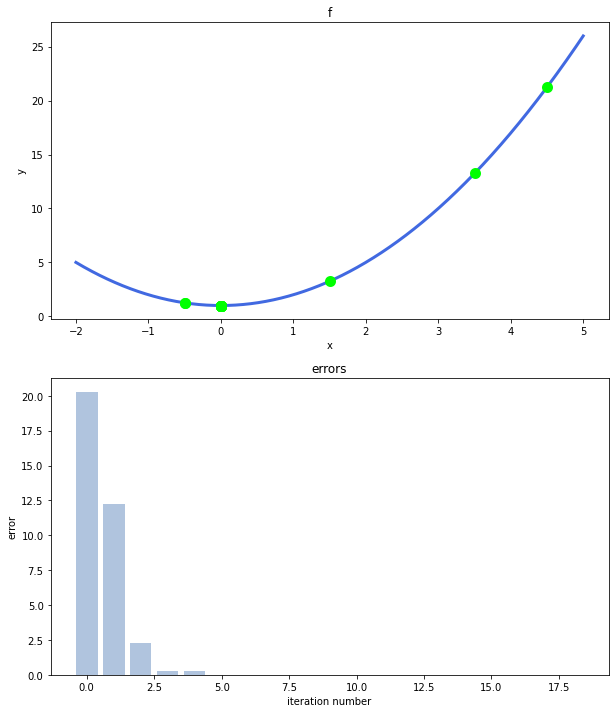

In [7]:
draw_steps(steps_1, f1, -2, 5, 0)

Możemy zauważyć, iż mimo dużej liczby iteracji, wartość dokładna została osiągnięta już dużo wcześniej, po około pięciu iteracjach.

> wartość początkowa x0 = 1000

In [8]:
x0_1 = 1000

In [9]:
steps_1_1 = []

In [10]:
sp.minimize(f1, x0=x0_1, method='nelder-mead', callback=save_steps(steps_1_1))

 final_simplex: (array([[ 0.00000000e+00],
       [-9.53674316e-05]]), array([1.        , 1.00000001]))
           fun: 1.0
       message: 'Optimization terminated successfully.'
          nfev: 54
           nit: 27
        status: 0
       success: True
             x: array([0.])

actual x:  0 actual min value:  1
x: [900.] f(x): 810001.0 error: 810000.0
x: [700.] f(x): 490001.0 error: 490000.0
x: [300.] f(x): 90001.0 error: 90000.0
x: [-100.] f(x): 10001.0 error: 10000.0
x: [-100.] f(x): 10001.0 error: 10000.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0
x: [0.] f(x): 1.0 error: 0.0


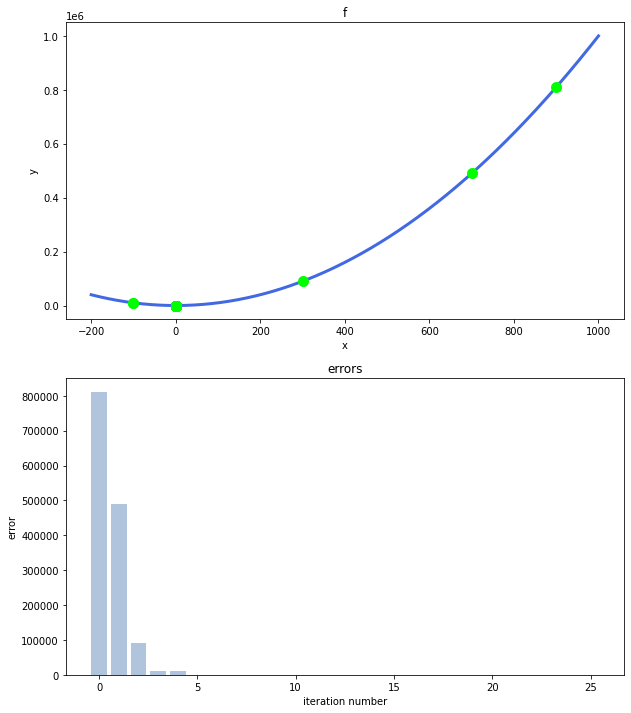

In [11]:
draw_steps(steps_1_1, f1, -200, 1000, 0)

W tym przypadku wybór punktu początkowego nie ma większego wpływu na liczbę iteracji.

* $f_2 = x^4 + x^3 - 2x^2$

> wartość początkowa: x0 = 2

In [12]:
f2 = lambda x: x**4 +x**3 -2*x**2
x0_2 = 2

In [13]:
steps_2 = []

In [14]:
sp.minimize(f2, x0=x0_2, method='nelder-mead', callback=save_steps(steps_2))

 final_simplex: (array([[0.69296875],
       [0.69306641]]), array([-0.39704634, -0.39704633]))
           fun: -0.39704633802138267
       message: 'Optimization terminated successfully.'
          nfev: 35
           nit: 17
        status: 0
       success: True
             x: array([0.69296875])

actual x:  -1.4430004681646913 actual min value:  -2.8334224090003515
x: [1.8] f(x): 9.849599999999997 error: 12.683022409000348
x: [1.4] f(x): 2.6655999999999938 error: 5.499022409000345
x: [0.6] f(x): -0.3743999999999994 error: 2.459022409000352
x: [0.6] f(x): -0.3743999999999994 error: 2.459022409000352
x: [0.6] f(x): -0.3743999999999994 error: 2.459022409000352
x: [0.7] f(x): -0.39690000000000003 error: 2.4365224090003514
x: [0.7] f(x): -0.39690000000000003 error: 2.4365224090003514
x: [0.7] f(x): -0.39690000000000003 error: 2.4365224090003514
x: [0.6875] f(x): -0.3969573974609375 error: 2.436465011539414
x: [0.69375] f(x): -0.39704467620849615 error: 2.4363777327918554
x: [0.69375] f(x): -0.39704467620849615 error: 2.4363777327918554
x: [0.69375] f(x): -0.39704467620849615 error: 2.4363777327918554
x: [0.69296875] f(x): -0.39704633802138267 error: 2.4363760709789686
x: [0.69296875] f(x): -0.39704633802138267 error: 2.4363760709789686
x: [0.69296875] f(x): -0.39704633802138267 erro

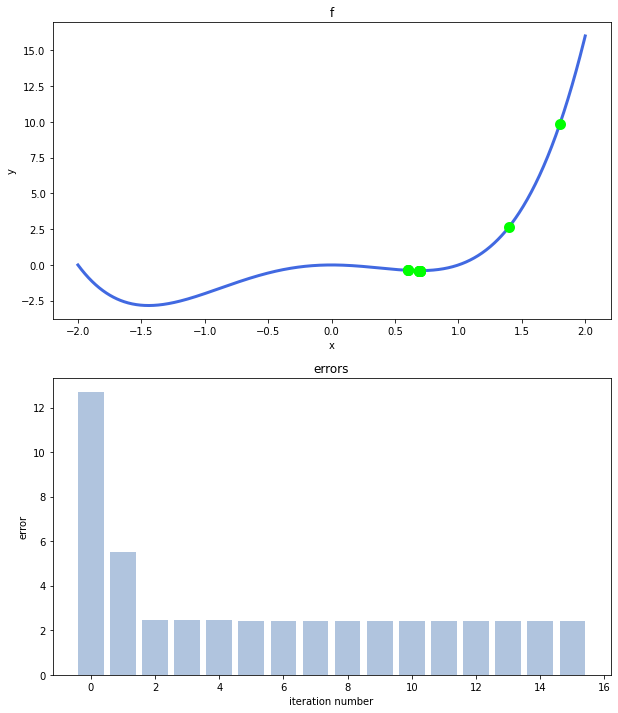

In [15]:
draw_steps(steps_2, f2, -2, 2, (-3-73**0.5)/8)

Testowana funkcja nie jest unimodalna, posiada 2 minima lokalne. W tym przypadku, wybrany punkt startowy znajdował się po stronie minimu lokalnego, które nie jest globalnym, a przez to metoda nie odnalazła prawidłowego wyniku.

> wartość początkowa: x0 = -2

In [16]:
x0_2_2 = -2

In [17]:
steps_2_2 = []

In [18]:
sp.minimize(f2, x0=x0_2_2, method='nelder-mead', callback=save_steps(steps_2_2))

 final_simplex: (array([[-1.44296875],
       [-1.44306641]]), array([-2.8334224 , -2.83342238]))
           fun: -2.8334224027987562
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 15
        status: 0
       success: True
             x: array([-1.44296875])

actual x:  -1.4430004681646913 actual min value:  -2.8334224090003515
x: [-1.8] f(x): -1.8144 error: 1.0190224090003515
x: [-1.4] f(x): -2.822399999999999 error: 0.01102240900035234
x: [-1.4] f(x): -2.822399999999999 error: 0.01102240900035234
x: [-1.4] f(x): -2.822399999999999 error: 0.01102240900035234
x: [-1.45] f(x): -2.8331187500000006 error: 0.00030365900035089766
x: [-1.45] f(x): -2.8331187500000006 error: 0.00030365900035089766
x: [-1.4375] f(x): -2.8332366943359375 error: 0.00018571466441397178
x: [-1.44375] f(x): -2.8334189437866217 error: 3.465213729736405e-06
x: [-1.44375] f(x): -2.8334189437866217 error: 3.465213729736405e-06
x: [-1.44375] f(x): -2.8334189437866217 error: 3.465213729736405e-06
x: [-1.44296875] f(x): -2.8334224027987562 error: 6.201595237342872e-09
x: [-1.44296875] f(x): -2.8334224027987562 error: 6.201595237342872e-09
x: [-1.44296875] f(x): -2.8334224027987562 error: 6.201595237342872e-09
x: [-1.44296875] f(x): -2.8334224027987562 error: 6.201595237342872e

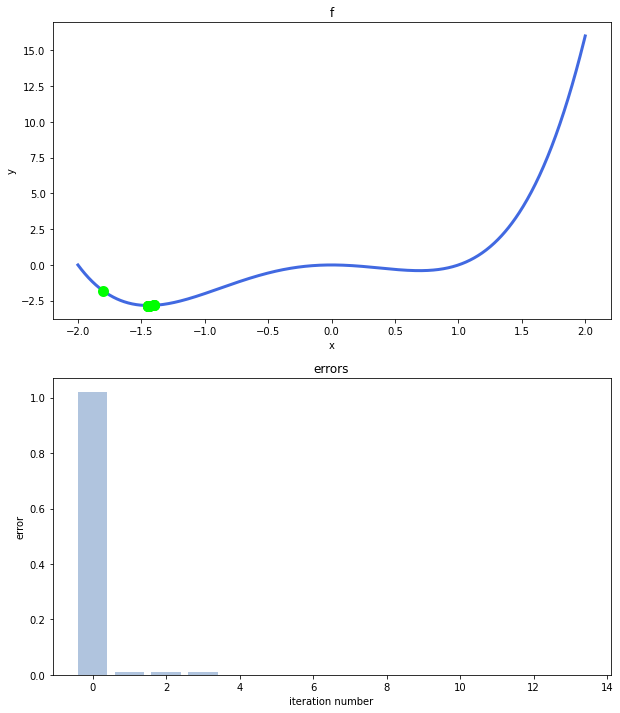

In [19]:
draw_steps(steps_2_2, f2, -2, 2, (-3-73**0.5)/8)

W przypadku tej wartości początkowej znalezione minimum jest minimum globalnym.

#### 2D

In [20]:
f2d = lambda x: 100*(x[0]**2 - x[1])**2 + (1-x[0]**2)
steps_2d = []

In [21]:
sp.minimize(f2d, x0=[1.2, 1], method='nelder-mead', callback=save_steps(steps_2d))

 final_simplex: (array([[ 16.29013491, 265.20041863],
       [ 16.15664294, 260.81469903],
       [ 15.96744789, 254.95849337]]), array([-261.54351669, -255.09039882, -253.95931142]))
           fun: -261.54351669007457
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 400
           nit: 214
        status: 1
       success: False
             x: array([ 16.29013491, 265.20041863])

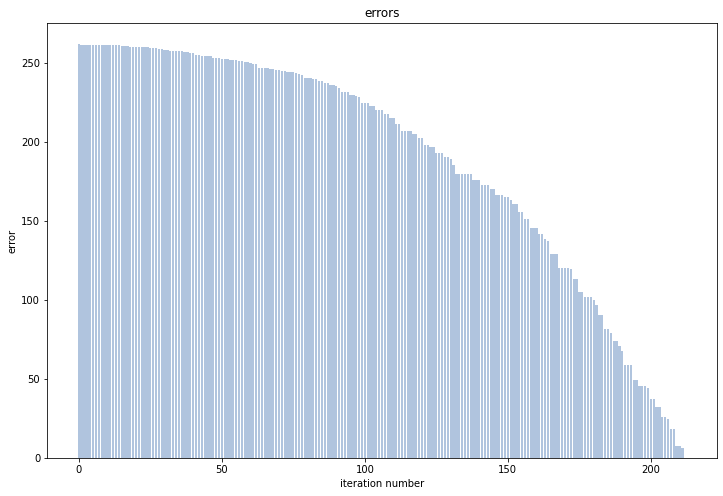

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

actual_f = -261.54351669007457
errors = []

for step in steps_2d:
    f_x = f2d(step)
    error = abs(actual_f - f_x)
    errors.append(error)
#     print('x:', step, 'f(x):', f_x, 'error:', error)

ax.bar(list(range(len(steps_2d))), errors, color='lightsteelblue')
ax.set_title('errors')
ax.set_xlabel('iteration number')
ax.set_ylabel('error')
plt.show()

W tym przypadku, metoda nie poradziła sobie ze znalezieniem minimum, przekroczony został limit liczby iteracji, wynika to z charakterystyki tej funkcji, należałoby użyć dla niej innej metody lub zwiększyć ograniczenie.

## Wnioski

- Nie ma uniwersalnej metody, korzystnej dla każdego przypadku. Metodę należy dobierać ze względu na charakterystykę zadanej funkcji.
- Minimalizacja jest wykorzystywana w wielu dziedzinach nauki, np. do znajdowania najlepszych parametrów modelu w uczeniu maszynowym czy do minimalizacji funkcji kosztu i maksymalizacji zysku.

M. Hawryluk 10.06.2021